<a href="https://colab.research.google.com/github/guilhermelaviola/BIArchitectureAndBigData/blob/main/Class04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Importing all the necessary libraries:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import spacy
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Setting the file search parameters:
filename = 'Data.xlsx'
search_path = '/content/drive/My Drive/Datasets/Descomplica'

# Searching for the file:
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    c4 = pd.read_excel(file)

In [22]:
# Importing and displaying the dataset:
data = pd.ExcelFile(file)
c4 = pd.read_excel(data, 'Class04')
c4

,ID,Item ID,Age,Title,Review text,Review,Recommendation rate,Positive feedback count,Division name,Department,Class
0,0,767,33,NaN,"Absolutely wonderful - silky, sexy and comfort...",4,1,0,Intimate,Intimate,Intimate
1,1,1080,34,NaN,I loved this dress! It's so beautiful. I happe...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had high hopes for this dress and really wan...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite purchase!,"I love, love, love this jumpsuit. It's fun, fl...",5,1,0,General Petite,Bottom,Pants
4,4,847,47,Flattering shirt,This shirt is a crowd-pleaser due to the adjus...,5,1,6,General,Top,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
95,95,863,83,Casual elegance!,I bought this top online and when I received i...,5,1,14,General,Top,Wool
96,96,845,44,NaN,I normally use a medium one and I bought a sma...,1,0,0,General Petite,Top,Blouses
97,97,861,44,Huge,I was so excited to order this top in red xs. ...,1,0,0,General Petite,Top,Wool
98,98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outdoor clothes


In [23]:
# Displaying the dataset columns:
c4.columns

Index(['ID', 'Item ID', 'Age', 'Title', 'Review text', 'Review',
       'Recommendation rate', 'Positive feedback count', 'Division name',
       'Department', 'Class'],
      dtype='object')

In [24]:
c4['Review text'] = c4['Review text'].fillna('').astype(str)
concat_text = ' '.join(c4['Review text'])
words = concat_text.lower().split()
frequency = Counter(words)
c4_frequency = pd.DataFrame(frequency.items(), columns=['Word', 'Frequency'])
c4_frequency.sort_values(by='Frequency', ascending=False, inplace=True)
c4_frequency.reset_index(drop=True, inplace=True)
c4_frequency

,Word,Frequency
0,the,345
1,i,257
2,and,241
3,a,191
4,it,180
...,...,...
1523,prepared,1
1524,xxs...,1
1525,encounter,1
1526,walk,1


In [25]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
nlp = spacy.load('en_core_web_sm')

def find_adjectives(text):
  doc = nlp(text)
  adjectives = [token.text.lower() for token in doc if token.pos_ == 'ADJ']
  return adjectives

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [27]:
all_adjectives = []

for evaluation in c4['Review text'].dropna():
  all_adjectives.extend(find_adjectives(evaluation))
adjectives_frequency = Counter(all_adjectives)
c4_adjectives = pd.DataFrame(adjectives_frequency.items(), columns=['Adjective', 'Frequency'])
c4_adjectives.sort_values(by='Frequency', ascending=False, inplace=True)
c4_adjectives.reset_index(drop=True, inplace=True)
c4_adjectives

,Adjective,Frequency
0,little,31
1,small,30
2,beautiful,30
3,comfortable,24
4,great,20
...,...,...
241,appropriate,1
242,amazing,1
243,skinny,1
244,faithful,1


In [28]:
# Generating the adjective WordCloud:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(c4_adjectives.set_index('Adjective')['Frequency'])

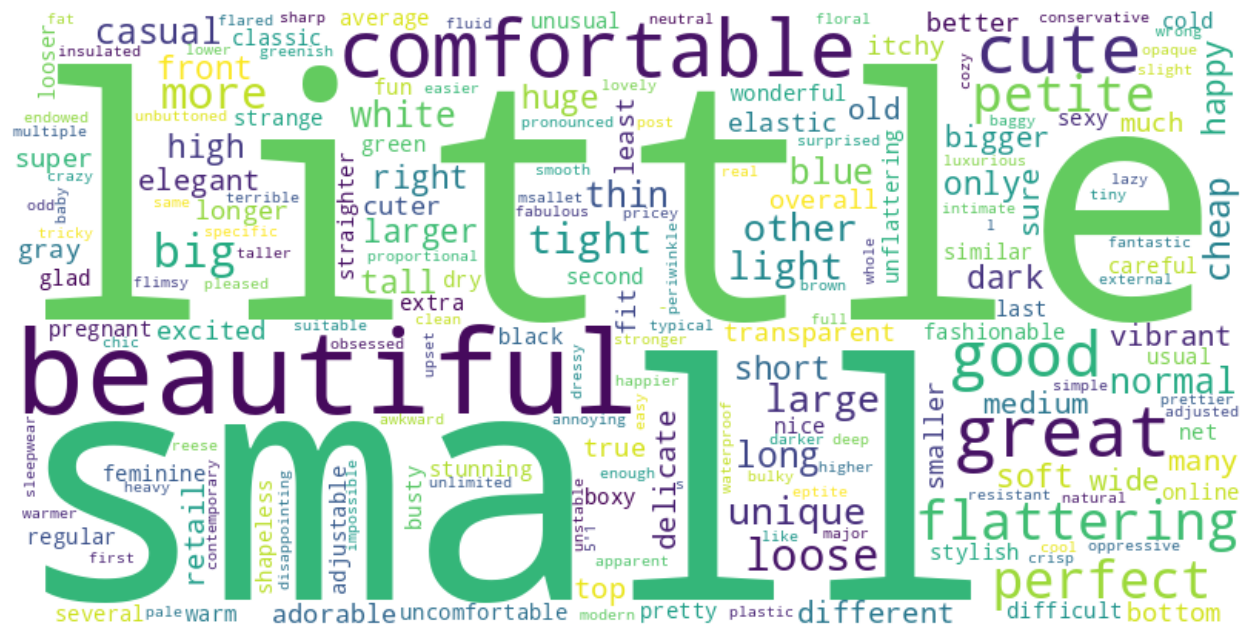

In [29]:
# Displaying the adjective WordCloud:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()